# Importing Modules

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Making Training Dataset with the help of Image Data Generator class

**Appyling some Data Augmentation for better training our model**

In [23]:
training_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.4,
                                                                   horizontal_flip=True,
                                                                   vertical_flip=True,
                                                                   shear_range=0.2,
                                                                   rotation_range=20,
                                                                   rescale=1/255)

In [24]:
training = training_generator.flow_from_directory('Dataset/train',class_mode='binary',
                                                 target_size=(150,150))

Found 1313 images belonging to 2 classes.


## Making Testing Dataset with the help of Image Data Generator class

In [25]:
testing_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [26]:
testing = testing_generator.flow_from_directory('Dataset/test',class_mode='binary',
                                                 target_size=(150,150))

Found 194 images belonging to 2 classes.


# Building CNN Layers for Feature Extraction

In [27]:
mask_model = tf.keras.models.Sequential()

mask_model.add(tf.keras.layers.Conv2D(30,(5,5),activation='relu',input_shape=(150,150,3)))
mask_model.add(tf.keras.layers.Conv2D(90,(4,4),activation='relu'))
# This is Pooling Layer
mask_model.add(tf.keras.layers.MaxPool2D((3,3)))

mask_model.add(tf.keras.layers.Conv2D(120,(3,3),activation='relu'))
# This is Pooling Layer
mask_model.add(tf.keras.layers.MaxPool2D((2,2)))


### Flatting Our Image

In [28]:
mask_model.add(tf.keras.layers.Flatten())

# Giving to ANN

In [29]:
mask_model.add(tf.keras.layers.Dense(units=24,activation='relu'))
mask_model.add(tf.keras.layers.Dense(units=24,activation='relu'))
mask_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [30]:
mask_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training Our model

In [31]:
mask_model.fit(training,validation_data=testing,epochs=5)

Epoch 1/5
42/42 [==============================] - 41s 960ms/step - loss: 0.7256 - accuracy: 0.4874 - val_loss: 0.6573 - val_accuracy: 0.5000
Epoch 2/5
42/42 [==============================] - 40s 938ms/step - loss: 0.6914 - accuracy: 0.5286 - val_loss: 0.6800 - val_accuracy: 0.6495
Epoch 3/5
42/42 [==============================] - 39s 935ms/step - loss: 0.6297 - accuracy: 0.6885 - val_loss: 0.5437 - val_accuracy: 0.7835
Epoch 4/5
42/42 [==============================] - 41s 968ms/step - loss: 0.2263 - accuracy: 0.9246 - val_loss: 0.1688 - val_accuracy: 0.9330
Epoch 5/5
42/42 [==============================] - 41s 980ms/step - loss: 0.1544 - accuracy: 0.9513 - val_loss: 0.1047 - val_accuracy: 0.9536


## Storing the model's history

In [33]:
report = mask_model.history.history

## Ploting the losses of model

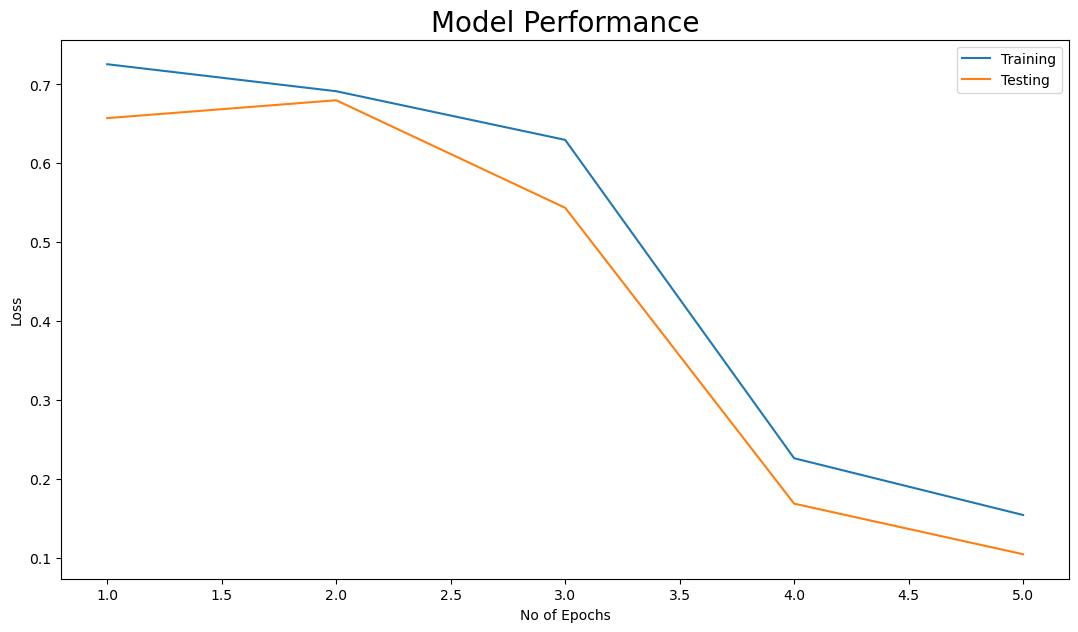

In [34]:
plt.figure(figsize=(13,7))
plt.plot(range(1,6),report['loss'],label='Training')
plt.plot(range(1,6),report['val_loss'],label='Testing')
plt.legend()
plt.title('Model Performance',size=20)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()

## Saving Our model

In [16]:
tf.keras.models.save_model(mask_model,'Face Detection Model.h5')

C:\Users\Sukh-e\AppData\Local\Temp\ipykernel_36176\3417508704.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(mask_model,'Face Detection Model.h5')
